# Introduction to matchms

`matchms` is an open-source Python library to handle, process, and compare MS/MS spectra. It is particularly geared towards large-scale similarity computations and metadata harmonization and filtering. In addition, matchms is intended to serve as a hub for developing new computational tools on top of it.

Some tools which are build on top of matchms:

+ [`Spec2Vec`](https://github.com/iomega/spec2vec) an alternative machine-learning spectral similarity score that can simply be installed by `pip install spec2vec` and be imported as `from spec2vec import Spec2Vec` following the same API as the scores in `matchms.similarity`.

+ [`MS2DeepScore`](https://github.com/matchms/ms2deepscore) a supervised, deep-learning based spectral similarity score that can simply be installed by `pip install ms2deepscore` and be imported as `from ms2deepscore import MS2DeepScore` following the same API as the scores in `matchms.similarity`.

+ [`MS2Query`](https://github.com/iomega/ms2query) Reliable and fast MS/MS spectral-based analogue search, running on top of matchms.

+ [`memo`](https://github.com/mandelbrot-project/memo) a method allowing a Retention Time (RT) agnostic alignment of metabolomics samples using the fragmentation spectra (MS2) of their constituents.

+ [Fermo](https://github.com/mmzdouc/FERMO) A dashboard app to integrate LC-MS(/MS) data with quantitative biological data and other metadata.

+ [SpecXplore](https://github.com/kevinmildau/specXplore) Interactive and adjustable mass-spectral data exploration

The source code of `matchms` is on GitHub --> https://github.com/matchms/matchms
This is also where you can interact with the developers of the tool (e.g., report problems, suggest new features, or: contribute yourself!).

## Filtering and cleaning spectra with matchms
This notebooks focuses on the cleaning and harmonizing of metadata using matchms 

Mass spectra come in many different formats and level of qualities. Matchms can help you to: 
- Harmonize metadata
- Derive missing metadata
- Remove spectra with mismatching metadata

Matchms filters are designed to be easy to run default pipelines, while allowing flexibility and good reproducibiliy. 

# Getting started

First install matchms (if you didn't do this already)

In [ ]:
!pip install matchms

### Loading in spectra
Matchms is able to work with many of the common open source formats, like: mgf, json, msp, mzml, mzxml and usi.
Below we work with dummy spectra available in [matchms_docs](https://github.com/matchms/matchms-docs). But feel free to use your own spectra instead. 

In [4]:
from matchms.importing.load_spectra import load_spectra
spectra = list(load_spectra("../data/pesticides.mgf"))

Matchms spectra are stored as matchms objects, which makes it easy to access all information of spectra

## Exploring the spectrum objects

To get the number of spectra in the list of spectra:

In [7]:
len(spectra)

76

To select the first spectrum:

In [8]:
spectra[0]

Spectrum(precursor m/z=183.06, 53 fragments between 70.8 and 202.3)

To ge the mz values of the first spectrum

In [9]:
spectra[0].peaks.mz

array([ 70.786774,  72.976173,  73.493057,  73.515923,  74.17305 ,
        75.004799,  77.80809 ,  82.050003,  82.620819,  82.860512,
        88.244919,  89.454147,  94.881096,  94.917038,  94.918587,
        94.993851, 102.743492, 106.645241, 106.876747, 109.907501,
       112.186974, 112.985817, 113.004906, 115.000427, 115.333664,
       116.995949, 117.046104, 117.763412, 122.933907, 125.587662,
       126.956421, 133.029556, 133.420456, 133.435806, 136.894592,
       138.90712 , 138.965378, 141.046158, 142.99292 , 142.995346,
       146.785355, 154.053802, 154.951416, 154.992584, 155.061676,
       163.001526, 170.366013, 182.987579, 183.007996, 183.056702,
       183.121933, 190.211334, 202.308212])

and the intensities

In [10]:
spectra[0].peaks.intensities

array([2.13612045e+02, 2.41782242e+02, 2.10330109e+02, 2.11937332e+02,
       2.09306686e+02, 3.13500000e+02, 2.10065475e+02, 2.16289841e+02,
       2.61580231e+02, 2.22143372e+02, 2.09090591e+02, 2.29945343e+02,
       2.19268311e+02, 1.09645889e+04, 4.62001892e+02, 3.22640625e+02,
       2.37246567e+02, 2.49806686e+02, 2.69230896e+02, 2.69221008e+02,
       2.37601974e+02, 2.10057617e+03, 2.36479034e+02, 1.16422888e+03,
       2.67863190e+02, 5.87184668e+03, 1.94295886e+03, 2.27911606e+02,
       2.68506836e+02, 2.59168152e+02, 3.19400940e+02, 4.31949585e+02,
       2.31658493e+02, 2.78857513e+02, 4.13464294e+02, 4.37397510e+03,
       3.30018127e+02, 3.65302460e+02, 8.55966187e+02, 1.03051746e+03,
       2.72870209e+02, 3.68399414e+03, 4.43910065e+02, 1.05579919e+03,
       1.47161031e+05, 2.38376001e+03, 2.83286346e+02, 1.70916406e+03,
       5.18744336e+03, 2.85898938e+05, 4.48362885e+02, 2.44807159e+02,
       3.27976257e+02])

And the available metadata

In [13]:
spectra[0].metadata

{'charge': 1,
 'ionmode': 'negative',
 'smiles': 'C1=CC=C2C(=C1)NC(=N2)C3=CC=CO3',
 'inchi': 'InChI=1S/C11H8N2O/c1-2-5-9-8(4-1)12-11(13-9)10-6-3-7-14-10/h1-7H,(H,12,13)',
 'pubmed': 'n/a',
 'scans': '675',
 'ms_level': '2',
 'instrument_type': '-Q-Exactive Plus Orbitrap Res 70k',
 'file_name': 'Pesticide_Mix6_neg.mzXML',
 'peptide_sequence': '*..*',
 'organism_name': 'GNPS-COLLECTIONS-PESTICIDES-NEGATIVE',
 'compound_name': 'Pesticide6_Fuberidazole_C11H8N2O_2-(2-Furyl)-1H-benzimidazole M-H',
 'principal_investigator': 'Dorrestein/Touboul',
 'data_collector': 'lfnothias',
 'submit_user': 'mwang87',
 'confidence': '1',
 'spectrum_id': 'CCMSLIB00001058235',
 'precursor_mz': 183.057}

To get specific metadata fields you can run spectrum.get()

In [15]:
spectra[0].get("ionmode")

'negative'

Spectra can also easily be plotted

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Pesticide6_Fuberidazole_C11H8N2O_2-(2-Furyl)-1H-benzimidazole M-H'}, xlabel='m/z', ylabel='Intensity'>)

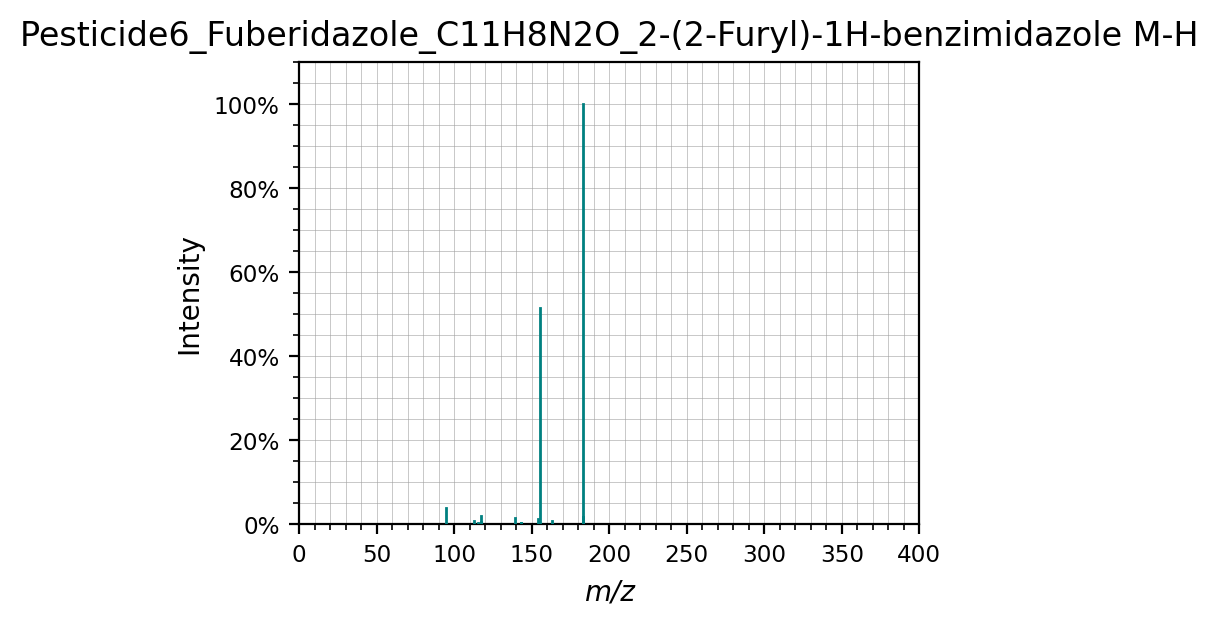

In [11]:
spectra[0].plot(figsize=(4,3))

Or plotted against each other

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

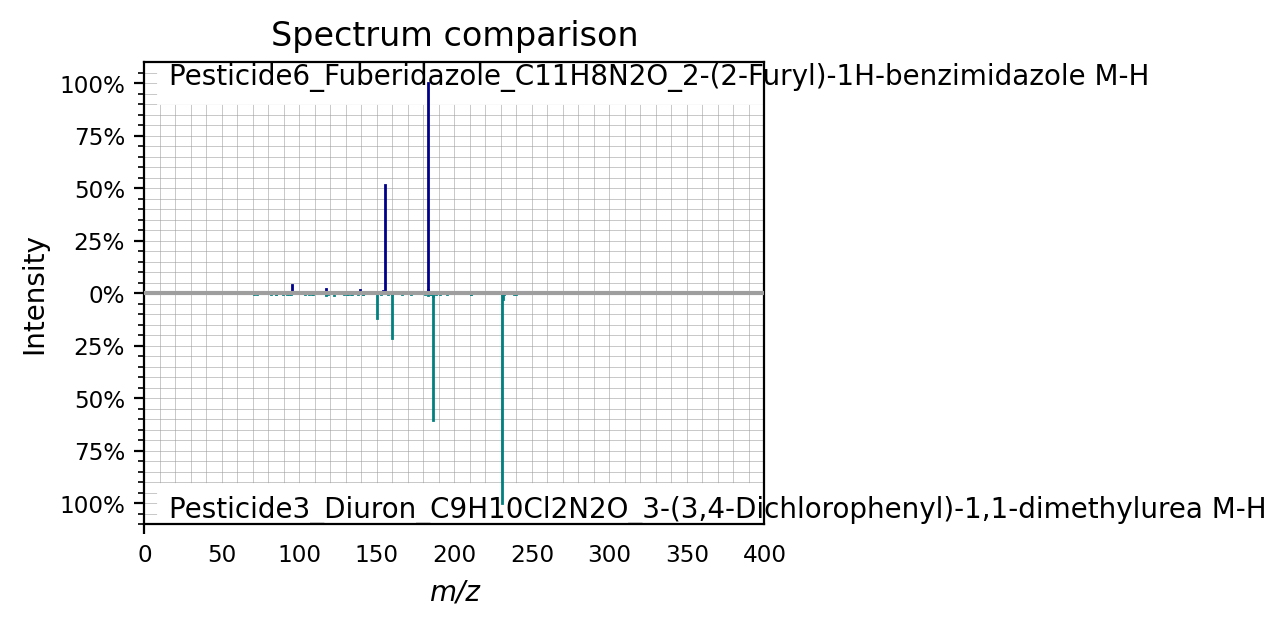

In [12]:
spectra[0].plot_against(spectra[8], figsize=(4,3))

## Cleaning and filtering spectra by using the matchms cleaning pipeline
Most of the time you will actually have to do more standard things, for this matchms has build in functionality.

`matchms` comes with many filtering functions (in `matchms.filtering`).
In general, there are filters with focus on the **metadata**. For instance to correct, add, edit, harmonize specific metadata fields. And there are filters for the **fragments**, for instance to remove small peaks, normalize peak intensities etc.

Here, we will apply:
- Normalize peak intensities (to max=1.0)
- Derive the adduct from the name field
- Derive the formula from the name

**Note** This is not a complete pipeline we would recommend to run, just for illustrative purposes

All filtering options we have available are stored in the folder https://github.com/matchms/matchms/tree/master/matchms/filtering/metadata_processing

In [35]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
workflow = create_workflow(
    query_filters=[msfilters.normalize_intensities,
                   msfilters.derive_adduct_from_name,
                   msfilters.derive_formula_from_name,
                  (msfilters.require_minimum_number_of_peaks, {"n_required": 20})])
pipeline = Pipeline(workflow)
processing_report = pipeline.run("../data/pesticides.mgf")
cleaned_spectra = pipeline.spectrums_queries

2024-06-10 11:46:18,138:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 11:46:18,139:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 11:46:18,140:WARNING:matchms:Pipeline:No logging file was defined.Logging messages will not be written to file.


Processing spectrums: 76it [00:00, 322.89it/s]


### processing report
The processing report gives an overview of what happened to the spectra.
It shows (if you used our example spectra) that:
- 3 spectra were removed because they had less than 20 peaks.
- For 76 spectra the adduct was derived from the compound name. 
- For 76 spectra the intensities were normalized. 
- The derive_fromula_from_name filter had no effect on the spectra

print(processing_report)

To see what happened we can print some of the metadata before and after the processing.

In [40]:
print("Adduct field before processing: ", spectra[0].get("adduct")) 
print("Compound name field before processing: ", spectra[0].get("compound_name")) 
print("Adduct field after processing: ", cleaned_spectra[0].get("adduct")) 
print("Compound name field after processing: ", cleaned_spectra[0].get("compound_name")) 

Adduct field before processing:  None
Compound name field before processing:  Pesticide6_Fuberidazole_C11H8N2O_2-(2-Furyl)-1H-benzimidazole M-H
Adduct field after processing:  [M-H]-
Compound name field after processing:  Pesticide6_Fuberidazole_C11H8N2O_2-(2-Furyl)-1H-benzimidazole


Moving the adduct to a separate field, makes the metadata computer readible. 

### Flexibility of matchms pipeline
Matchms comes with many predefined filters and there are constantly new filters added by the community. However, you could have specific needs for your spectra, which are not natively available in matchms. 
A new filter can easily be added by writing a custum function and adding it to the matchms pipeline. If you think this filter would be usefull for the rest of the community, please create an [issue](https://github.com/matchms/matchms/issues) or even better a pull request with the suggested code. In this way you will become part of the matchms developer team as well :) 

Here we give a simple example of how you could add a filter to the pipeline. This filter should allow you to only select spectra that contain a specific peak. 

In [41]:
def select_spectra_containing_fragment(spectrum_in, fragment_of_interest, tolerance):
  for fragment_mz, intensity in spectrum_in.peaks:
    # Check if the fragment is close to the fragment_of_interest
    if fragment_mz > fragment_of_interest - tolerance and  fragment_mz < fragment_of_interest + tolerance:
      return spectrum_in
  return None


In [45]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
workflow = create_workflow(
    query_filters=[msfilters.normalize_intensities,
                   msfilters.derive_adduct_from_name,
                   msfilters.derive_formula_from_name,
                  (msfilters.require_minimum_number_of_peaks, {"n_required": 20})])
pipeline = Pipeline(workflow)
pipeline.processing_queries.parse_and_add_filter((select_spectra_containing_fragment,
                                                  {"fragment_of_interest": 155.0, "tolerance": 1.0}))
processing_report = pipeline.run("../data/pesticides.mgf")
cleaned_spectra = pipeline.spectrums_queries
print(processing_report)

2024-06-10 11:55:54,843:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 11:55:54,843:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 11:55:54,859:WARNING:matchms:Pipeline:No logging file was defined.Logging messages will not be written to file.


Processing spectrums: 76it [00:00, 294.69it/s]

----- Spectrum Processing Report -----
Number of spectrums processed: 76
Number of spectrums removed: 52
Changes during processing:
                                    removed spectra  changed metadata  changed mass spectrum
filter                                                                                      
select_spectra_containing_fragment               49                 0                      0
require_minimum_number_of_peaks                   3                 0                      0
derive_adduct_from_name                           0                76                      0
normalize_intensities                             0                 0                     76
derive_formula_from_name                          0                 0                      0


Now only the spectra are kept that have a fragment close to 155 Da. For instance:

(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': "Pesticide3_Fluometuron_C10H11F3N2O_Urea, N,N-dimethyl-N'-[3-(trifluoromethyl)phenyl]-"}, xlabel='m/z', ylabel='Intensity'>)

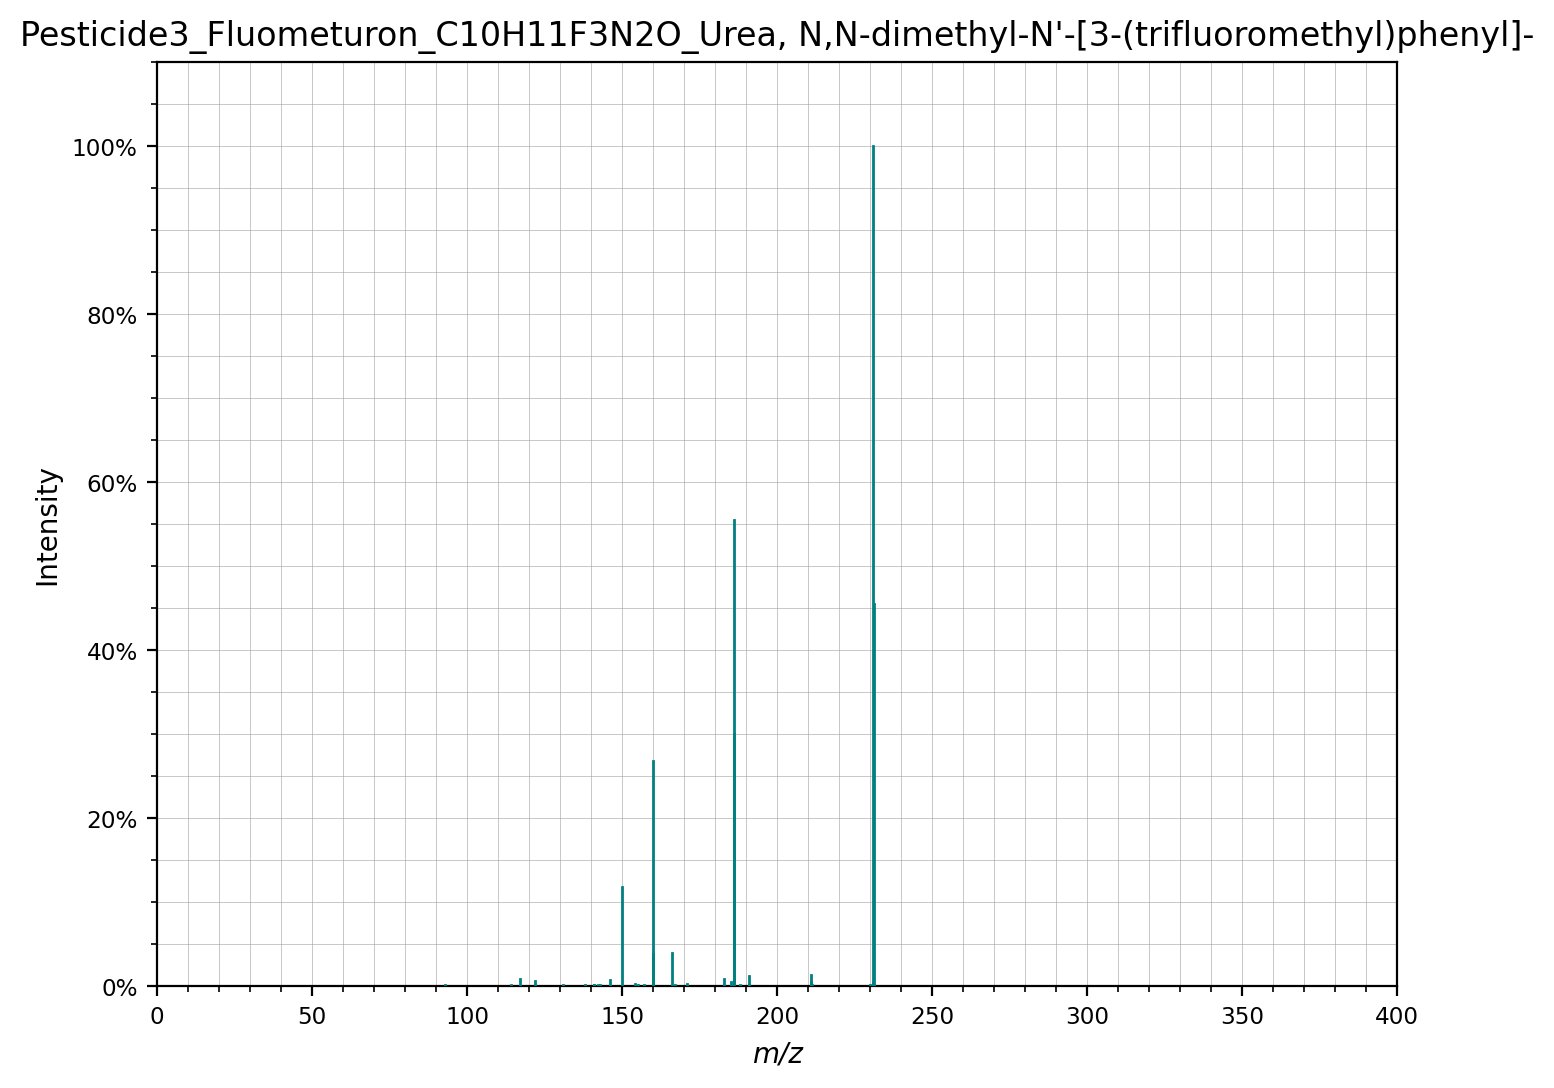

In [49]:
cleaned_spectra[1].plot()

## Default pipelines
To make it easier we have created predefined pipelines for different use cases. 
Please still check if the invidual filters do what is applicable for your specific use case.

Here we give the example of a pipeline used for cleaning annotated spectrum libraries.
This could alternatively also be run by specifying all the separate filters. 

In [52]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
from matchms.filtering.default_pipelines import BASIC_FILTERS, DEFAULT_FILTERS, LIBRARY_CLEANING

workflow = create_workflow(
    query_filters=LIBRARY_CLEANING)
pipeline = Pipeline(workflow)
processing_report = pipeline.run("../data/pesticides.mgf")
cleaned_spectra = pipeline.spectrums_queries
print(processing_report)

2024-06-10 13:06:39,297:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:06:39,299:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:06:39,301:WARNING:matchms:Pipeline:No logging file was defined.Logging messages will not be written to file.


Processing spectrums: 76it [00:02, 30.18it/s]

----- Spectrum Processing Report -----
Number of spectrums processed: 76
Number of spectrums removed: 8
Changes during processing:
                                                  removed spectra  changed metadata  changed mass spectrum
filter                                                                                                    
require_matching_adduct_precursor_mz_parent_mass                8                 0                      0
derive_adduct_from_name                                         0                76                      0
add_retention_index                                             0                76                      0
add_retention_time                                              0                76                      0
correct_charge                                                  0                76                      0
harmonize_undefined_inchikey                                    0                76                      0
add_parent_ma

## Reproducibility by Yaml file
To have a reproducible file for rerunning pipeline a Yaml file can be created, this contains all the matchms filters and their corresponding filters that were run. This makes it easy for sharing in materials and methods, but also to reproduce previously run pipelines. 

In [58]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
from matchms.filtering.default_pipelines import BASIC_FILTERS, DEFAULT_FILTERS, LIBRARY_CLEANING

workflow = create_workflow(
    yaml_file_name="../data/matchms_settings.yaml", # to save as a yaml file
    query_filters=LIBRARY_CLEANING)
pipeline = Pipeline(workflow)
processing_report = pipeline.run("../data/pesticides.mgf")
cleaned_spectra = pipeline.spectrums_queries

2024-06-10 13:13:55,718:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:13:55,720:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:13:55,720:WARNING:matchms:Pipeline:No logging file was defined.Logging messages will not be written to file.


Processing spectrums: 76it [00:02, 28.92it/s]


The yaml file is saved and looks like this:

In [59]:
with open("../data/matchms_settings.yaml", "r") as yaml_file:
    print(yaml_file.read())

# Matchms pipeline config file 
# Change and adapt fields where necessary 
# ==================== 
query_filters:
- - require_correct_ms_level
  - required_ms_level: 2
- make_charge_int
- add_compound_name
- - derive_adduct_from_name
  - remove_adduct_from_name: true
- - derive_formula_from_name
  - remove_formula_from_name: true
- clean_compound_name
- interpret_pepmass
- add_precursor_mz
- add_retention_index
- add_retention_time
- derive_ionmode
- correct_charge
- - require_precursor_mz
  - maximum_mz: null
    minimum_accepted_mz: 10.0
- - harmonize_undefined_inchikey
  - aliases: null
    undefined: ''
- - harmonize_undefined_inchi
  - aliases: null
    undefined: ''
- - harmonize_undefined_smiles
  - aliases: null
    undefined: ''
- repair_inchi_inchikey_smiles
- clean_adduct
- - add_parent_mass
  - estimate_from_adduct: true
    estimate_from_charge: true
    overwrite_existing_entry: false
- - derive_annotation_from_compound_name
  - annotated_compound_names_file: null
    mas

The yaml file can also easily be used to rerun a pipeline in the exact same way:

In [61]:
from matchms.yaml_file_functions import load_workflow_from_yaml_file
from matchms.Pipeline import Pipeline, create_workflow

workflow = load_workflow_from_yaml_file("../data/matchms_settings.yaml")
pipeline = Pipeline(workflow)
processing_report = pipeline.run("../data/pesticides.mgf")


2024-06-10 13:16:49,573:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:16:49,576:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:16:49,576:WARNING:matchms:Pipeline:No logging file was defined.Logging messages will not be written to file.


Processing spectrums: 76it [00:02, 29.27it/s]


# Saving results
The cleaned spectra and a logging file (with processing report) can automatically be saved. 

In [66]:
from matchms.yaml_file_functions import load_workflow_from_yaml_file
from matchms.Pipeline import Pipeline, create_workflow

workflow = load_workflow_from_yaml_file("../data/matchms_settings.yaml")
pipeline = Pipeline(workflow,
                   logging_level="INFO", # Set logging level e.g. INFO, WARNING, ERROR
                   logging_file="../data/matchms_cleaning.log") # Set the file where to store the logging

processing_report = pipeline.run("../data/pesticides.mgf",
                                 cleaned_query_file="../data/cleaned_spectra.mgf") # Set where to save the spectra. 


Processing spectrums: 76it [00:02, 25.82it/s]


### Logging
The logging first prints the settings, followed by detailed logging (can be set less verbose by setting logging_level="WARNING") and ending with the processing report

In [67]:
with open("../data/matchms_cleaning.log", "r") as yaml_file:
    print(yaml_file.read())

--- Processing pipeline query spectra: ---
Processing steps:
- - require_correct_ms_level
  - required_ms_level: 2
- make_charge_int
- add_compound_name
- - derive_adduct_from_name
  - remove_adduct_from_name: true
- - derive_formula_from_name
  - remove_formula_from_name: true
- clean_compound_name
- interpret_pepmass
- add_precursor_mz
- add_retention_index
- add_retention_time
- derive_ionmode
- correct_charge
- - require_precursor_mz
  - maximum_mz: null
    minimum_accepted_mz: 10.0
- - harmonize_undefined_inchikey
  - aliases: null
    undefined: ''
- - harmonize_undefined_inchi
  - aliases: null
    undefined: ''
- - harmonize_undefined_smiles
  - aliases: null
    undefined: ''
- repair_inchi_inchikey_smiles
- clean_adduct
- - add_parent_mass
  - estimate_from_adduct: true
    estimate_from_charge: true
    overwrite_existing_entry: false
- - derive_annotation_from_compound_name
  - annotated_compound_names_file: null
    mass_tolerance: 0.1
- derive_smiles_from_inchi
- derive_

## Order of filters
Filters are automatically ordered by matchms. This is important since some filters depend on other filters being run first. For instance derive_adduct_from_name, should be run before require_matching_adduct_and_ionmode. With many filters it can become quite complex to correctly order all filters. 

In [79]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
workflow = create_workflow(
    query_filters=[msfilters.require_matching_adduct_and_ionmode,
                   msfilters.derive_adduct_from_name,
                   ])
pipeline = Pipeline(workflow)
pipeline.processing_queries.processing_steps

2024-06-10 13:40:29,295:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:40:29,295:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.


[('derive_adduct_from_name', {'remove_adduct_from_name': True}),
 'require_matching_adduct_and_ionmode']

As you can see derive_adduct_from_name is placed before require_matching_adduct_and_ionmode

To add filters at a specific location or override the default filter order of matchms, you can specify the filter_position to add the filter at a specific location.

In [83]:
import os
from matchms.Pipeline import Pipeline, create_workflow
import matchms.filtering as msfilters
workflow = create_workflow(
    query_filters=[
                   msfilters.derive_adduct_from_name,
                   ])
pipeline = Pipeline(workflow)

pipeline.processing_queries.parse_and_add_filter(msfilters.require_matching_adduct_and_ionmode, filter_position=0)
pipeline.processing_queries.processing_steps


2024-06-10 13:44:45,533:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.
2024-06-10 13:44:45,534:WARNING:matchms:Pipeline:The order of the filters has been changed compared to the Yaml file.


['require_matching_adduct_and_ionmode',
 ('derive_adduct_from_name', {'remove_adduct_from_name': True})]

## Further questions
If something is unclear, or if you want new functionality in matchms, please make an issue at [https://github.com/matchms/matchms/issues] or become a co-developer by forking matchms and creating new Pull Requests.